<a href="https://colab.research.google.com/github/gigioo/MiniProjeto_1/blob/main/Projeto_Indicacao_Imoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Giovanni Benini Bonatto

RID #43668



## Questão de Negócio


Roof Imóveis é uma das maiores empresas do ramo imobiliário Brasileiro
e quer expandir sua área de atuação fazendo um investimento internacional,
com isso, ela contratou esse estudo para uma consultoria estratégica.
A empresa irá investir em imóveis no Condado de County, nos Estados
Unidos. Considera-se que a empresa possui 2 principais fontes de renda:

- compra e venda de imóveis
- locação de imóveis












## Entendimento do Negócio

### Disponibilidade dos dados

Os dados estão disponíveis através da plataforma Kaggle através do [link](https://www.kaggle.com/harlfoxem/housesalesprediction). São eles:
- **id** (*integer*): Identificador único do imóvel
- **date** (*string*): Data da Venda
- **price** (*float*): Preço de venda
- **bedrooms** (*integer*): Nº de Quartos
- **bathrooms** (*float*): Nº de Banheiros
- **sqft_living** (*integer*): Tamanho de área habitável em ft²
- **sqft_lot** (*integer*): Tamanho do terreno em ft²
- **floors** (*float*): Número de andares
- **waterfront** (*integer*): Indicativo se o imóvel é a beira-mar
- **view** (*integer*): Grau de quão belo é a vista do imóvel (0 a 4)
- **condition** (*integer*): Condição da casa (1 a 5)
- **grade** (*integer*): Classificação por qualidade de material utilizado na
construção
- **sqft_above** (*integer*): Área em acima do solo em ft²
- **sqft_basmt** (*integer*): Área em abaixo do solo em ft²
- **yr_built** (*integer*): Ano de construção
- **yr_renov** (*integer*): Ano de restauração, caso o contrário, 0.
- **zipcode** (*integer*): Zip Code 5 - Similar ao CEP
- **lat** (*float*): Latitude
- **long** (*float*): Longitude
- **squft_liv15** (*integer*): Média da área habitável dos 15 imóveis mais próximos,
em ft²
- **squft_lot15** (*integer*): Média da área do lote dos 15 imóveis mais próximos,
em ft²

todos esse dados são relevantes, porém existem alguns campos que precisam de tratativas para um melhor entendimento dos dados, um exemplo desses campos é o campo de zipcode ou lat e long. 

## Coleta de dados

Inicialmente os dados são simples de coompreender e são relevantes dependendo dos pontos de análise.


Foi possível incorporar novos dados através de *feature engineering*:
- Criação do campo 'city'e 'Value_per_ft'
- analisar o valor de terreno
- quantidade de vendas do mesmo imóvel
- variação de preço para imóveis com mais de uma venda


## Limpeza de dados

Não foi necessário excluir nenhum dado, apenas tratamento de alguns campos.


## Exploração dos dados

A exploração dos dados utilizou estratégias de:
- filtragem e classificação
- tratamento de dados
- estatística descritiva e inferencial
- visualização de dados

5 imóveis sugeridos por terem as características muito parecidas com o imóvel que mais valorizou:
- 3013300895
- 3679401110
- 3083000940
- 2887700875
- 7625703945

5 Imóveis não sugeridos por conta da alta desvalorização:
- 7167000040
- 2726049071
- 4139420590
- 2767603612
- 8682262400

In [ ]:
#Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#Importando a base de dados 
df_imoveis= pd.read_csv('kc_house_data.csv', sep=',')

In [ ]:
df_imoveis

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
#Compreendendo os dados que foram importados
df_imoveis.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df_imoveis['price'].mean()

540088.1417665294

In [ ]:
#Tratamento/conversão do campo date para datetime
df_imoveis['date'] = pd.to_datetime( df_imoveis['date'], format='%Y-%m-%d' )

In [ ]:
#Criação do campo 'Value_per_ft para sabermos o valor por pes
df_imoveis['Value_per_ft']=df_imoveis['price']/df_imoveis['sqft_living']

In [ ]:
df_imoveis

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Value_per_ft
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,188.050847
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,209.338521
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,233.766234
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,308.163265
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,303.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,235.294118
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,173.160173
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,394.216667
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,250.000000


In [ ]:
#instalando biblioteca para identificar os zipcodes
!pip install uszipcode 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76 kB 3.8 MB/s 
     |████████████████████████████████| 121 kB 59.8 MB/s 


In [ ]:
#importando e referenciando o SearchEngine
from uszipcode import SearchEngine 
engine = SearchEngine() 

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


In [ ]:
#Criação do campo city que será preenchido com o vetor cidades
cidades = [] 
for index, row in df_imoveis.iterrows():     
  zipcode = engine.by_zipcode(df_imoveis['zipcode'][index])    
  cidades.append(zipcode.major_city) 
df_imoveis['city'] = cidades 
df_imoveis.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Value_per_ft,city
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,188.050847,Seattle
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,209.338521,Seattle
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,233.766234,Kenmore
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,308.163265,Seattle
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,303.571429,Sammamish


In [ ]:
#Realizando  consulta  com  valor  nota e cidade 
df_imoveis[['Value_per_ft','sqft_lot','grade','city']]

,Value_per_ft,sqft_lot,grade,city
0,188.050847,5650,7,Seattle
1,209.338521,7242,7,Seattle
2,233.766234,10000,6,Kenmore
3,308.163265,5000,7,Seattle
4,303.571429,8080,8,Sammamish
...,...,...,...,...
21608,235.294118,1131,8,Seattle
21609,173.160173,5813,8,Seattle
21610,394.216667,1350,7,Seattle
21611,250.000000,2388,8,Issaquah


In [ ]:
#contando quantos imóveis existem por cidade
df_imoveis['city'].value_counts()

Seattle          8977
Renton           1597
Bellevue         1407
Kent             1203
Redmond           979
Kirkland          977
Auburn            912
Sammamish         800
Federal Way       779
Issaquah          733
Maple Valley      590
Woodinville       471
Snoqualmie        310
Kenmore           283
Mercer Island     282
Enumclaw          234
North Bend        221
Bothell           195
Duvall            190
Carnation         124
Vashon            118
Black Diamond     100
Fall City          81
Medina             50
Name: city, dtype: int64

In [ ]:
#Criação de DF  com o valor médio por ft agrupado por cidade
media_preco_por_cidade=df_imoveis.groupby(['city'])['Value_per_ft'].agg('mean').reset_index()
media_preco_por_cidade

,city,Value_per_ft
0,Auburn,153.044820
1,Bellevue,340.335312
2,Black Diamond,210.095356
3,Bothell,225.987235
4,Carnation,223.084512
5,Duvall,203.001725
6,Enumclaw,181.806440
7,Fall City,255.233620
8,Federal Way,151.864892
9,Issaquah,260.549165


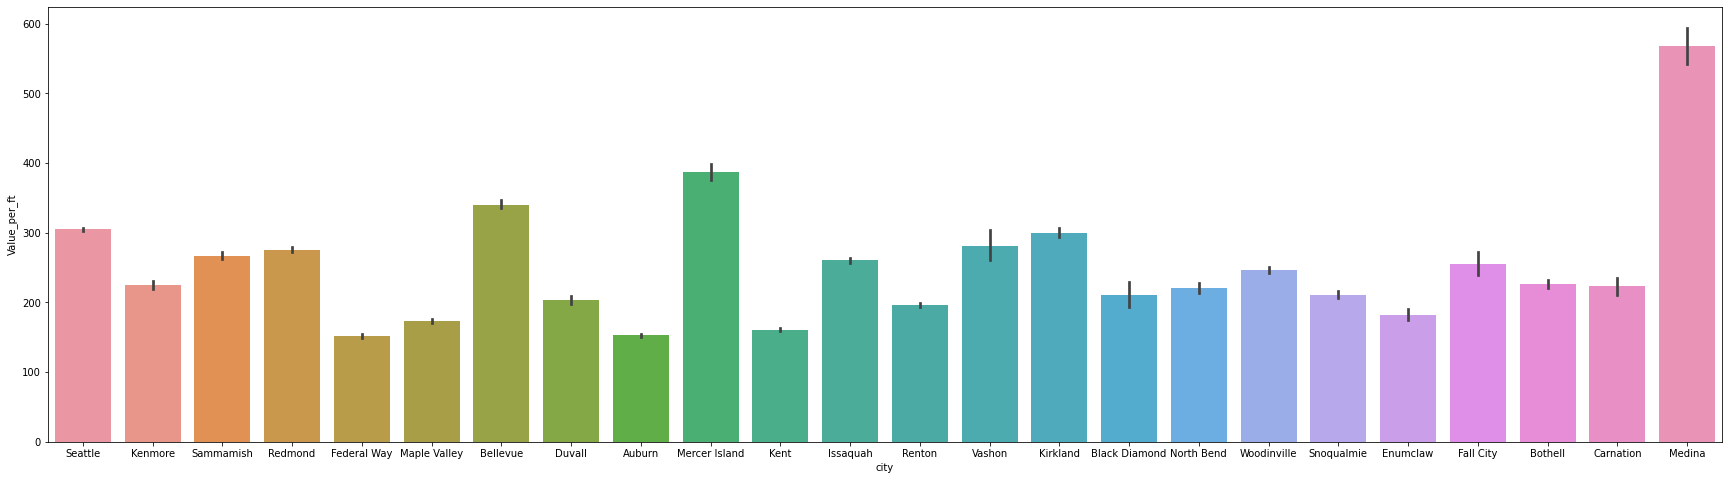

In [ ]:
# criação de gráfico de barras com o df criado 
#Insight: Lugar com valor por fts mais elevado é Medina 
fig, axes =plt.subplots(figsize=(30,8))

sns.barplot(data=df_imoveis, x='city',y='Value_per_ft',ax= axes);



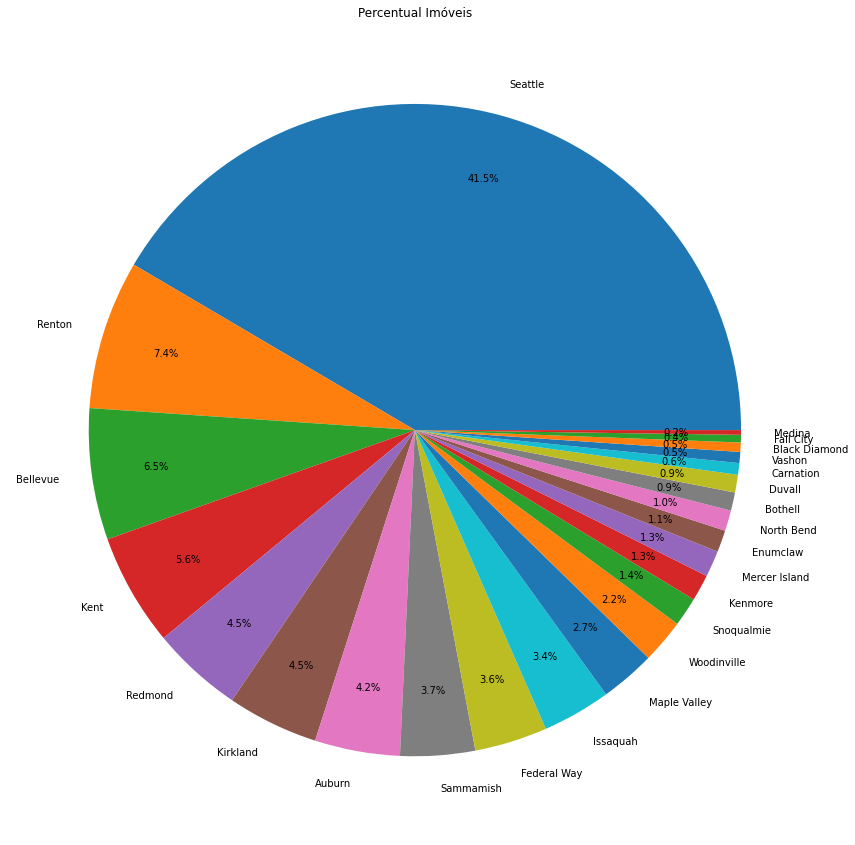

In [ ]:
#Criando um gráfico de pizza para Verificar o percentual de imóveis por cidade. 
# a grande maioria dos imóveis está localizada em Seattle, Renton, Bellevue, Kent, Redmond, Kirland e Auburn (>70%).
tam_da_figura = plt.figure(figsize=(15, 15))
plt.title('Percentual Imóveis')
plt.pie(df_imoveis['city'].value_counts(), labels=df_imoveis['city'].value_counts().index, autopct='%.1f%%', pctdistance=.8)
plt.show()

In [ ]:
#Conferindo valors por preço/ft²

df_cheap = df_imoveis.sort_values(by=['Value_per_ft'])
df_cheap

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Value_per_ft,city
18262,2891000610,2014-12-11,148900.0,4,1.75,1700,6000,1.0,0,0,...,0,1967,0,98002,47.3252,-122.208,1280,6000,87.588235,Auburn
3785,723049156,2014-05-23,149000.0,3,1.00,1700,8645,1.0,0,0,...,0,1955,0,98146,47.4899,-122.337,1500,7980,87.647059,Seattle
13825,5637200450,2014-10-17,257000.0,5,2.75,2930,10148,2.0,0,0,...,0,2002,0,98059,47.4887,-122.145,2930,8425,87.713311,Renton
17197,5111400086,2014-05-12,110000.0,3,1.00,1250,53143,1.0,0,0,...,0,1945,0,98038,47.4235,-122.051,1820,217800,88.000000,Maple Valley
1385,3342700465,2015-01-23,250000.0,3,1.50,2840,10182,1.0,0,0,...,1330,1951,0,98056,47.5240,-122.200,2210,9669,88.028169,Renton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9314,4389200610,2014-12-01,903000.0,2,1.50,1140,7800,1.0,0,0,...,0,1947,0,98004,47.6142,-122.209,2020,7800,792.105263,Bellevue
8623,6303400395,2015-01-30,325000.0,1,0.75,410,8636,1.0,0,0,...,0,1953,0,98146,47.5077,-122.357,1190,8636,792.682927,Seattle
10446,1118000320,2015-05-08,3400000.0,4,4.00,4260,11765,2.0,0,0,...,980,1939,2010,98112,47.6380,-122.288,4260,10408,798.122066,Seattle
4013,724069059,2014-05-09,2400000.0,3,2.25,3000,11665,1.5,1,4,...,0,2001,0,98075,47.5884,-122.086,3000,15959,800.000000,Sammamish


In [ ]:
#Selecionando as primeiras 10 linhas
df_cheap.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Value_per_ft,city
18262,2891000610,2014-12-11,148900.0,4,1.75,1700,6000,1.0,0,0,...,0,1967,0,98002,47.3252,-122.208,1280,6000,87.588235,Auburn
3785,723049156,2014-05-23,149000.0,3,1.00,1700,8645,1.0,0,0,...,0,1955,0,98146,47.4899,-122.337,1500,7980,87.647059,Seattle
13825,5637200450,2014-10-17,257000.0,5,2.75,2930,10148,2.0,0,0,...,0,2002,0,98059,47.4887,-122.145,2930,8425,87.713311,Renton
17197,5111400086,2014-05-12,110000.0,3,1.00,1250,53143,1.0,0,0,...,0,1945,0,98038,47.4235,-122.051,1820,217800,88.000000,Maple Valley
1385,3342700465,2015-01-23,250000.0,3,1.50,2840,10182,1.0,0,0,...,1330,1951,0,98056,47.5240,-122.200,2210,9669,88.028169,Renton
6523,8661000089,2014-07-16,199950.0,3,2.75,2270,13590,1.5,0,0,...,970,1948,0,98022,47.2099,-122.001,1160,13545,88.083700,Enumclaw
14993,4222310010,2014-12-26,152500.0,4,1.00,1730,7350,1.5,0,0,...,0,1970,0,98003,47.3467,-122.307,1440,7752,88.150289,Federal Way
12185,7686202065,2014-07-23,170000.0,4,1.75,1920,7500,1.0,0,0,...,0,1962,0,98198,47.4222,-122.318,1490,8000,88.541667,Seattle
8200,5379804470,2014-06-17,170000.0,4,1.00,1920,13787,1.0,0,0,...,700,1966,0,98188,47.4502,-122.277,1490,11200,88.541667,Seattle
18590,2154900040,2014-10-30,194250.0,3,2.25,2190,8834,1.0,0,0,...,800,1987,0,98001,47.2633,-122.244,1490,8766,88.698630,Auburn


In [ ]:

#Selecionando Imóveis mais caros( 5 entre os 10 mais caros estão em Seattle)
#insight: levando em consideração apenas o preço por área habitável, temos imóveis com notas boas e ruins.
df_expensive = df_imoveis.sort_values(by=['Value_per_ft'], ascending=False)
df_expensive.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Value_per_ft,city
19336,6021500970,2015-04-07,874950.0,2,1.00,1080,4000,1.0,0,0,...,0,1940,0,98117,47.6902,-122.387,1530,4240,810.138889,Seattle
4013,724069059,2014-05-09,2400000.0,3,2.25,3000,11665,1.5,1,4,...,0,2001,0,98075,47.5884,-122.086,3000,15959,800.000000,Sammamish
10446,1118000320,2015-05-08,3400000.0,4,4.00,4260,11765,2.0,0,0,...,980,1939,2010,98112,47.6380,-122.288,4260,10408,798.122066,Seattle
8623,6303400395,2015-01-30,325000.0,1,0.75,410,8636,1.0,0,0,...,0,1953,0,98146,47.5077,-122.357,1190,8636,792.682927,Seattle
9314,4389200610,2014-12-01,903000.0,2,1.50,1140,7800,1.0,0,0,...,0,1947,0,98004,47.6142,-122.209,2020,7800,792.105263,Bellevue
18597,3222049087,2015-04-22,570000.0,1,1.00,720,7540,1.0,1,4,...,0,1905,0,98198,47.3509,-122.323,1120,9736,791.666667,Seattle
7313,4131900066,2014-08-25,3100000.0,3,3.00,3920,13085,2.0,1,4,...,0,1996,0,98040,47.5716,-122.204,3450,13287,790.816327,Mercer Island
6243,5536100010,2015-02-04,1050000.0,4,1.00,1330,9729,1.0,0,0,...,0,1952,0,98004,47.6223,-122.208,2920,10353,789.473684,Bellevue
12757,2767603026,2015-04-15,425000.0,2,1.00,540,2500,1.0,0,0,...,0,1905,0,98107,47.6729,-122.383,1290,5000,787.037037,Seattle
18876,9808700025,2015-02-11,1500000.0,3,1.50,1910,21374,1.0,0,0,...,0,1955,0,98004,47.6453,-122.214,2850,16167,785.340314,Bellevue


In [ ]:
#Verificação de duplicados e Cálculo de valores de revenda
revenda = df_imoveis[df_imoveis.duplicated(['id'], keep=False)].sort_values(by='id')
revenda

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Value_per_ft,city
2497,1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,0,0,...,0,1991,0,98002,47.3262,-122.214,2060,7316,125.000000,Auburn
2496,1000102,2014-09-16,280000.0,6,3.00,2400,9373,2.0,0,0,...,0,1991,0,98002,47.3262,-122.214,2060,7316,116.666667,Auburn
16814,7200179,2014-10-16,150000.0,2,1.00,840,12750,1.0,0,0,...,0,1925,0,98055,47.4840,-122.211,1480,6969,178.571429,Renton
16815,7200179,2015-04-24,175000.0,2,1.00,840,12750,1.0,0,0,...,0,1925,0,98055,47.4840,-122.211,1480,6969,208.333333,Renton
11434,109200390,2014-10-20,250000.0,3,1.75,1480,3900,1.0,0,0,...,0,1980,0,98023,47.2977,-122.367,1830,6956,168.918919,Federal Way
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345,9828200460,2014-06-27,260000.0,2,1.00,700,4800,1.0,0,0,...,0,1922,0,98122,47.6147,-122.300,1440,4800,371.428571,Seattle
15200,9834200305,2015-02-10,615000.0,3,1.00,1790,3876,1.5,0,0,...,700,1904,0,98144,47.5750,-122.288,1360,4080,343.575419,Seattle
15199,9834200305,2014-07-16,350000.0,3,1.00,1790,3876,1.5,0,0,...,700,1904,0,98144,47.5750,-122.288,1360,4080,195.530726,Seattle
1085,9834200885,2014-07-17,360000.0,4,2.50,2080,4080,1.0,0,0,...,1040,1962,0,98144,47.5720,-122.290,1340,4080,173.076923,Seattle


In [ ]:
duplicates = df_imoveis[df_imoveis.id.duplicated(keep=False)]
duplicados = duplicates.groupby('id')['price'].apply(list)
print(duplicados.to_string()) #assim eu consegui uma série com todos os imóveis vendidos e o preço de venda

id
1000102                 [280000.0, 300000.0]
7200179                 [150000.0, 175000.0]
109200390               [245000.0, 250000.0]
123039336               [148000.0, 244900.0]
251300110               [225000.0, 358000.0]
302000375               [169100.0, 250000.0]
324000530               [201500.0, 459000.0]
526059224               [260000.0, 470000.0]
641900050               [335000.0, 499950.0]
643300040               [481000.0, 719521.0]
705730280               [325000.0, 335000.0]
722039087               [220500.0, 329000.0]
723049156               [149000.0, 284700.0]
726049190               [287500.0, 431000.0]
795000620     [115000.0, 124000.0, 157000.0]
937000330               [157000.0, 246500.0]
1036400200              [661000.0, 697000.0]
1139600270              [300000.0, 310000.0]
1217000340              [185000.0, 340000.0]
1219000473              [164950.0, 371000.0]
1231000510              [263000.0, 510000.0]
1232000810              [340000.0, 537000.0]
1237500

In [ ]:
#transformando a serie em dataframe
duplicados.to_frame(name='price') 
table_dups = pd.DataFrame({'id':duplicados.index, 'price':duplicados.values})
table_dups.at[14, 'price'] = [115000.0, 157000.0] #esse imóvel foi o único vendido 3 vezes, deixei só a primeira e última venda
table_dups.head(16) #conferindo se deu certo

,id,price
0,1000102,"[280000.0, 300000.0]"
1,7200179,"[150000.0, 175000.0]"
2,109200390,"[245000.0, 250000.0]"
3,123039336,"[148000.0, 244900.0]"
4,251300110,"[225000.0, 358000.0]"
5,302000375,"[169100.0, 250000.0]"
6,324000530,"[201500.0, 459000.0]"
7,526059224,"[260000.0, 470000.0]"
8,641900050,"[335000.0, 499950.0]"
9,643300040,"[481000.0, 719521.0]"


In [ ]:

split_price = pd.DataFrame(table_dups['price'].tolist(), columns=['v1', 'v2'])
# verificando
split_price

,v1,v2
0,280000.0,300000.0
1,150000.0,175000.0
2,245000.0,250000.0
3,148000.0,244900.0
4,225000.0,358000.0
...,...,...
171,195000.0,322000.0
172,1895000.0,1940000.0
173,260000.0,430000.0
174,350000.0,615000.0


In [ ]:
#juntando os dois dataframes resultantes
table_dups = pd.concat([table_dups, split_price], axis=1)
table_dups

,id,price,v1,v2
0,1000102,"[280000.0, 300000.0]",280000.0,300000.0
1,7200179,"[150000.0, 175000.0]",150000.0,175000.0
2,109200390,"[245000.0, 250000.0]",245000.0,250000.0
3,123039336,"[148000.0, 244900.0]",148000.0,244900.0
4,251300110,"[225000.0, 358000.0]",225000.0,358000.0
...,...,...,...,...
171,9407110710,"[195000.0, 322000.0]",195000.0,322000.0
172,9809000020,"[1895000.0, 1940000.0]",1895000.0,1940000.0
173,9828200460,"[260000.0, 430000.0]",260000.0,430000.0
174,9834200305,"[350000.0, 615000.0]",350000.0,615000.0


In [ ]:
#excluindo campo price
table_dups = table_dups.drop('price', axis=1)

table_dups

,id,v1,v2
0,1000102,280000.0,300000.0
1,7200179,150000.0,175000.0
2,109200390,245000.0,250000.0
3,123039336,148000.0,244900.0
4,251300110,225000.0,358000.0
...,...,...,...
171,9407110710,195000.0,322000.0
172,9809000020,1895000.0,1940000.0
173,9828200460,260000.0,430000.0
174,9834200305,350000.0,615000.0


In [ ]:
#criando coluna de revenda
table_dups['resale'] = table_dups['v2'] - table_dups['v1']
table_dups

,id,v1,v2,resale
0,1000102,280000.0,300000.0,20000.0
1,7200179,150000.0,175000.0,25000.0
2,109200390,245000.0,250000.0,5000.0
3,123039336,148000.0,244900.0,96900.0
4,251300110,225000.0,358000.0,133000.0
...,...,...,...,...
171,9407110710,195000.0,322000.0,127000.0
172,9809000020,1895000.0,1940000.0,45000.0
173,9828200460,260000.0,430000.0,170000.0
174,9834200305,350000.0,615000.0,265000.0


In [ ]:
table_dups.sort_values(by=['resale'], ascending=False)

,id,v1,v2,resale
113,6021500970,345000.0,874950.0,529950.0
147,7977201065,350000.0,740000.0,390000.0
131,7409700215,550000.0,921500.0,371500.0
100,4443800385,410000.0,778100.0,368100.0
57,2568300045,305000.0,649950.0,344950.0
...,...,...,...,...
159,8682262400,430000.0,419950.0,-10050.0
63,2767603612,500000.0,489000.0,-11000.0
88,4139420590,1212500.0,1200000.0,-12500.0
61,2726049071,510000.0,489950.0,-20050.0


In [ ]:
table_dups.sort_values(by=['resale']).head(5)

,id,v1,v2,resale
127,7167000040,740000.0,700000.0,-40000.0
61,2726049071,510000.0,489950.0,-20050.0
88,4139420590,1212500.0,1200000.0,-12500.0
63,2767603612,500000.0,489000.0,-11000.0
159,8682262400,430000.0,419950.0,-10050.0


In [ ]:
#buscando as características do imóvel que mais  se valorizou
df_imoveis[(df_imoveis['id']==6021500970)]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Value_per_ft,city
19335,6021500970,2014-05-28,345000.0,2,1.0,1080,4000,1.0,0,0,...,0,1940,0,98117,47.6902,-122.387,1530,4240,319.444444,Seattle
19336,6021500970,2015-04-07,874950.0,2,1.0,1080,4000,1.0,0,0,...,0,1940,0,98117,47.6902,-122.387,1530,4240,810.138889,Seattle


In [ ]:
#Buscando no df imóveis com características parecidas com as do imóvel que mais se valorizou
df_resultado_seattle=df_imoveis[(df_imoveis['bedrooms']==2)&(df_imoveis['bathrooms']==1)&(df_imoveis['sqft_living']>=1000)&(df_imoveis['yr_built']>1910)&((df_imoveis['city']=='Seattle'))&(df_imoveis['city']=='Seattle')&(df_imoveis['price']<=345000)&(df_imoveis['Value_per_ft']>=319)]

In [ ]:
#a baixo alguns imóveis mais novos  e com características  muito parecidas com o imóvel que mais se valorizou
df_resultado_seattle.sort_values(by=['price']).head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Value_per_ft,city
2821,3679401110,2014-05-30,332000.0,2,1.0,1000,4776,1.0,0,0,...,0,1942,0,98108,47.5619,-122.315,1500,4800,332.000000,Seattle
14931,3013300895,2014-07-18,337000.0,2,1.0,1010,4000,1.0,0,0,...,0,1947,0,98136,47.5311,-122.382,1480,4366,333.663366,Seattle
19120,3083000940,2015-04-12,341000.0,2,1.0,1040,4000,1.0,0,0,...,0,1914,0,98144,47.5753,-122.303,1740,4000,327.884615,Seattle
12232,2887700875,2014-07-23,344000.0,2,1.0,1060,3325,1.5,0,0,...,290,1932,0,98115,47.6896,-122.307,1820,4275,324.528302,Seattle
7648,7625703945,2014-07-01,345000.0,2,1.0,1080,7775,1.0,0,0,...,0,1955,0,98136,47.5447,-122.394,1730,7350,319.444444,Seattle
